This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

## CREATE GRAD-SHAFRANOV PROBLEM
Equilibrium = GradShafranovSolver()

## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = False
Equilibrium.GhostStabilization = True
Equilibrium.PARALLEL = False

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.dim = 2                    # PROBLEM SPATIAL DIMENSION
Equilibrium.QuadratureOrder2D = 8      # ORDER OF SURFACE NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.QuadratureOrder1D = 4      # ORDER OF LENGTH NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.ext_maxiter = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3           # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4           # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.it_plasma = 0              # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Equilibrium.tol_saddle = 0.2           # TOLERANCE FOR DISTANCE BETWEEN CONSECUTIVE ITERATION SADDLE POINTS (LETS PLASMA REGION CHANGE)
Equilibrium.beta = 1.0e6               # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.Nconstrainedges = -1       # NUMBER OF PLAMA BOUNDARY APPROXIMATION EDGES ON WHICH CONSTRAIN BC
Equilibrium.zeta = 1.0e-2              # GHOST PENALTY PARAMETER
Equilibrium.PSIrelax = False           # PSI SOLUTION AITKEN RELAXATION SWITCH
Equilibrium.lambda0 = 0.3              # INITIAL AIKITEN'S RELAXATION PARAMETER
Equilibrium.PHIrelax = False           # PHI LEVEL-SET AITKEN RELAXATION SWITCH
Equilibrium.alphaPHI = 0.5             # PHI LEVEL-SET AITKEN RELAXATION INITIAL PARAMETER 
Equilibrium.R0_axis = 6.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 1.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0            # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50          # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6          # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY


In [2]:
Equilibrium.InitialiseParameters()
Equilibrium.InitialisePickleLists()

INITIALISE SIMULATION PARAMETERS...Done!


In [3]:
### SELECT COMPUTATIONAL MESH

###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-COARSE-REC'
#MESH = 'TRI03-MEDIUM-REC'
#MESH = 'TRI03-INTERMEDIATE-REC'
#MESH = 'TRI03-FINE-REC'
#MESH = 'TRI03-SUPERFINE-REC'
#MESH = 'TRI03-MEGAFINE-REC'

#MESH = 'TRI06-COARSE-REC'
#MESH = 'TRI06-MEDIUM-REC'
#MESH = 'TRI06-INTERMEDIATE-REC'
#MESH = 'TRI06-FINE-REC'
MESH = 'TRI06-SUPERFINE-REC'
#MESH = 'TRI06-MEGAFINE-REC'

Equilibrium.MESH = Mesh(MESH)

Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI06-SUPERFINE-REC
READ MESH FILES...Done!


Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI03-FINE-ITFW
READ MESH FILES...Done!


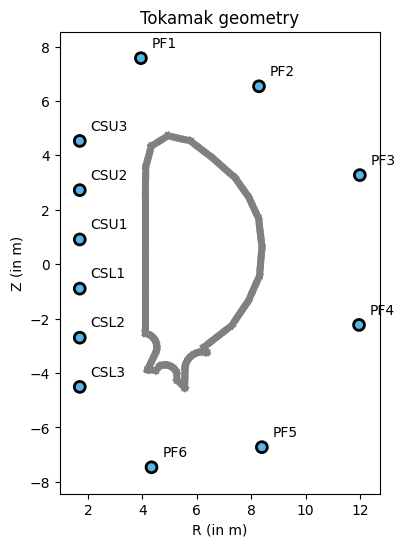

In [4]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS
# COILS
coil1 = Coil(name = 'PF1',
             X = np.array([3.9431,7.5741]),
             I = 5.73e6)
coil2 = Coil(name = 'PF2',
             X = np.array([8.2851,6.5398]),
             I = -2.88e6)
coil3 = Coil(name = 'PF3',
             X = np.array([11.9919,3.2752]),
             I = -5.81e6)
coil4 = Coil(name = 'PF4',
             X = np.array([11.9630,-2.2336]),
             I = -4.78e6)
coil5 = Coil(name = 'PF5',
             X = np.array([ 8.3908,-6.7269]),
             I = -7.81e6)
coil6 = Coil(name = 'PF6',
             X = np.array([4.3340, -7.4665]),
             I = 16.94e6)
   
# SOLENOIDS AS COILS
solenoid1 = Coil(name = 'CSL3',
                 X = np.array([1.696, np.mean([-5.415,-3.6067])]),
                 I = 5.3e6)
solenoid2 = Coil(name = 'CSL2',
                 X = np.array([1.696, np.mean([-3.6067, -1.7983])]),
                 I = -10.3e6)
solenoid3 = Coil(name = 'CSL1',
                 X = np.array([1.696, np.mean([-1.7983, 0.0])]),
                 I = -20.8e6)
solenoid4 = Coil(name = 'CSU1',
                 X = np.array([1.696, np.mean([0.0, 1.8183])]),
                 I = -20.8e6)
solenoid5 = Coil(name = 'CSU2',
                 X = np.array([1.696, np.mean([1.8183, 3.6267])]),
                 I = -4.05e6)
solenoid6 = Coil(name = 'CSU3',
                 X = np.array([1.696, np.mean([3.6267, 5.435])]),
                 I = -4.82e6)

magnets = [coil1, coil2, coil3, coil4, coil5, coil6,
           solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

# TOKAMAK WALL MESH
TOKmesh = Mesh('TRI03-FINE-ITFW')
Equilibrium.TOKAMAK = Tokamak(WALL_MESH = TOKmesh,
                              MAGNETS = magnets)

Equilibrium.TOKAMAK.Plot()

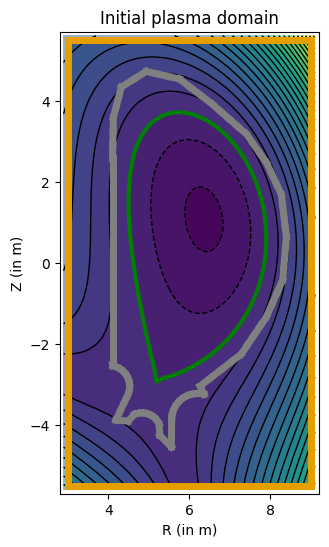

In [5]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

import numpy as np

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

"""
X_SADDLE = np.array([5.4, -2.9])
X_RIGHT = np.array([7.8, 0.4])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.4])
"""

"""
X_SADDLE = np.array([5.3, -2.8])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.7])
"""

X_SADDLE = np.array([5.2, -2.9])
X_RIGHT = np.array([7.9, 0.6])
X_LEFT = np.array([4.5, 1.5])
X_TOP = np.array([5.9, 3.7])

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Equilibrium.initialPHI.Plot()

In [6]:
Equilibrium.InitialiseDomainDiscretisation()

INITIALISE ELEMENTAL DISCRETISATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.017818574514037656 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.20265348838508873 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·19.738125565344674
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Warning:  Element 2884, subelem 0: surface integration quadrature is not accurate.
Done!
Done!


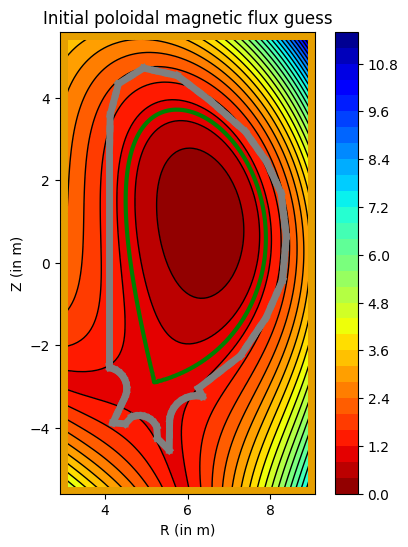

In [7]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

"""
X_SADDLE = np.array([5.4, -2.9])
X_RIGHT = np.array([7.8, 0.4])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.4])
"""

"""
X_SADDLE = np.array([5.3, -2.8])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.7])
"""

X_SADDLE = np.array([5.2, -2.9])
X_RIGHT = np.array([7.9, 0.6])
X_LEFT = np.array([4.5, 1.5])
X_TOP = np.array([5.9, 3.7])


X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

Equilibrium.initialPSI.Plot()

In [8]:
Equilibrium.InitialisePSI()

INITIALISE PSI...
     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
     -> ASSIGN INITIAL PLASMA BOUNDARY VALUES...Done!
Done!


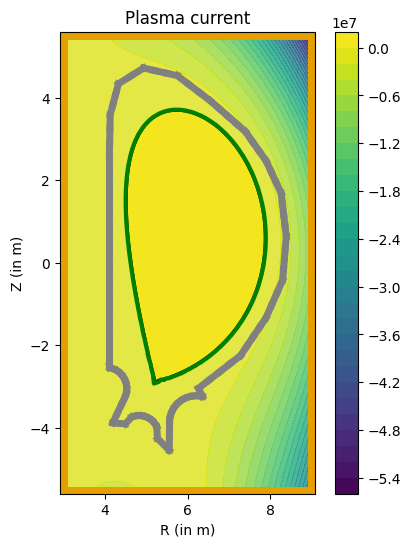

In [9]:
### DEFINE PLASMA CURRENT MODEL

# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Equilibrium.mu0*(R0**2)*q0*kappa)

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = -15e6)  # TOTAL PLASMA CURRENT
"""

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

Equilibrium.IntegratePlasmaDomain(Equilibrium.PlasmaCurrent.Jphi)

Equilibrium.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE PSI_B...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Done!
     -> ASSIGN INITIAL VACUUM VESSEL BOUNDARY VALUES...Done!
Done!
WRITE INITIAL SIMULATION DATA...Done!


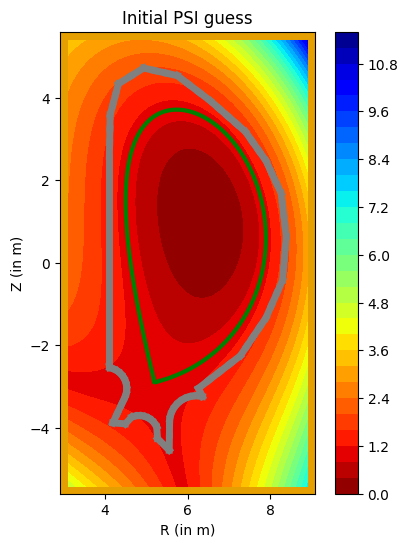

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  14999999.999999953
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.45108948 0.81073227]  (ELEMENT  876 ) WITH VALUE PSI_0 =  -11.240994799140925
SADDLE POINT AT  [ 5.08857351 -3.29572481]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.3082227193452245


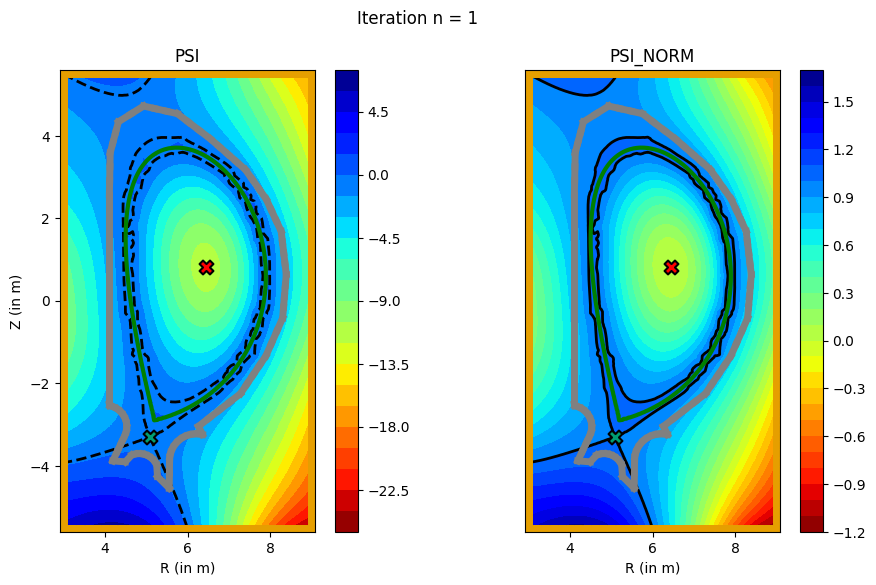

Internal iteration =  1 , PSI_NORM residu =  2.9437482318275174
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  14999999.99999989
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.48992657 0.71160376]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -14.240770852878548
SADDLE POINT AT  [ 5.08358475 -3.33793703]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.014152759068727193


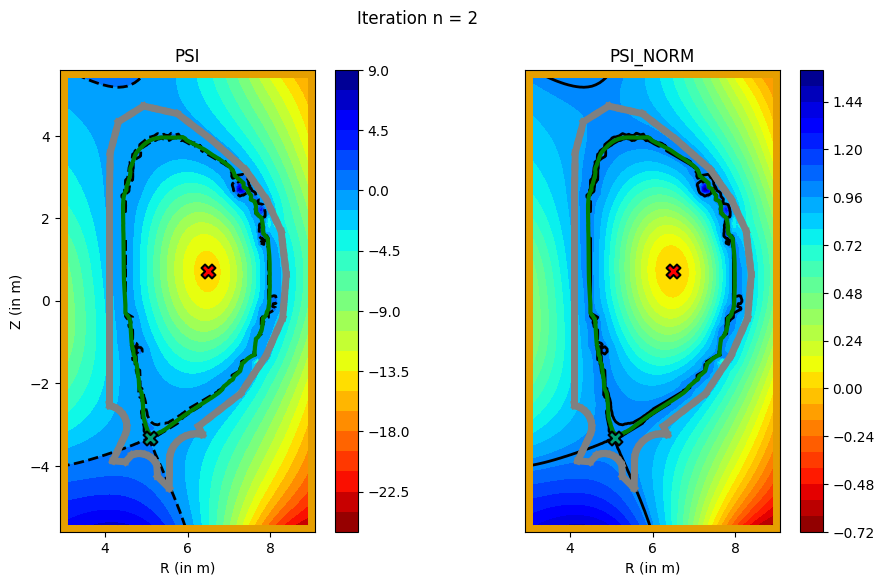

Internal iteration =  2 , PSI_NORM residu =  0.15587056302231447
 
Plasma region unchanged: distance between consecutive saddle points =  0.04250598631337734
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  15000000.000000041
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.51072707 0.6643271 ]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -13.283623384667047
SADDLE POINT AT  [ 5.08271826 -3.33775934]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.014072208803455687


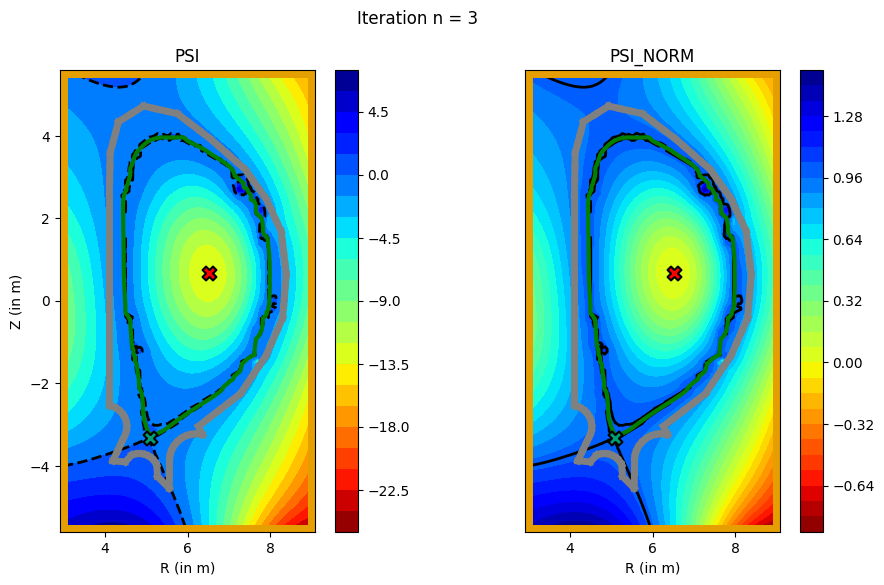

Internal iteration =  3 , PSI_NORM residu =  0.03878101330290998
 
Plasma region unchanged: distance between consecutive saddle points =  0.0424403765731045
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  14999999.999999888
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.51801787 0.64137898]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.172399413115702
SADDLE POINT AT  [ 5.08261577 -3.33771582]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.014056456331528917


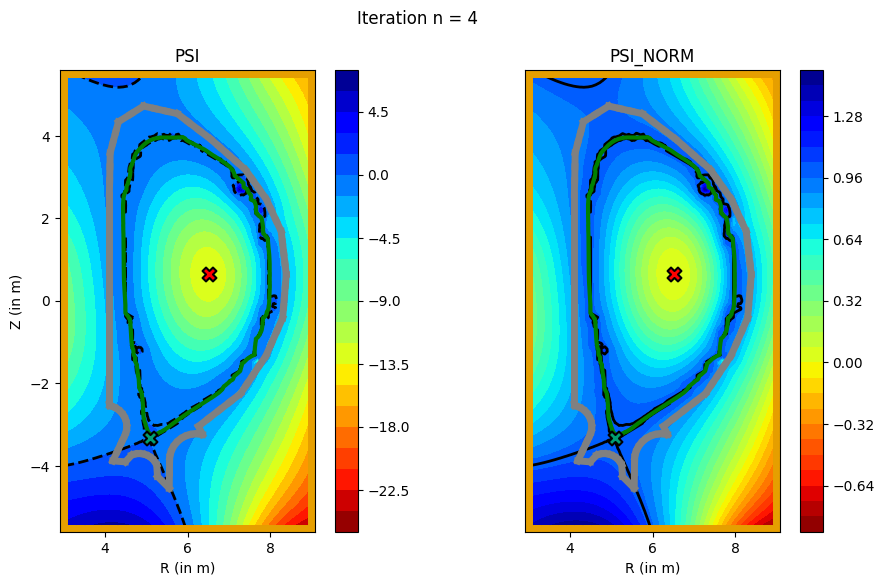

Internal iteration =  4 , PSI_NORM residu =  0.005780624540278005
 
Plasma region unchanged: distance between consecutive saddle points =  0.042411552116156936
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  15000000.000000104
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52033167 0.6304178 ]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.16263007857201
SADDLE POINT AT  [ 5.08257658 -3.33769583]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.01404944029804674


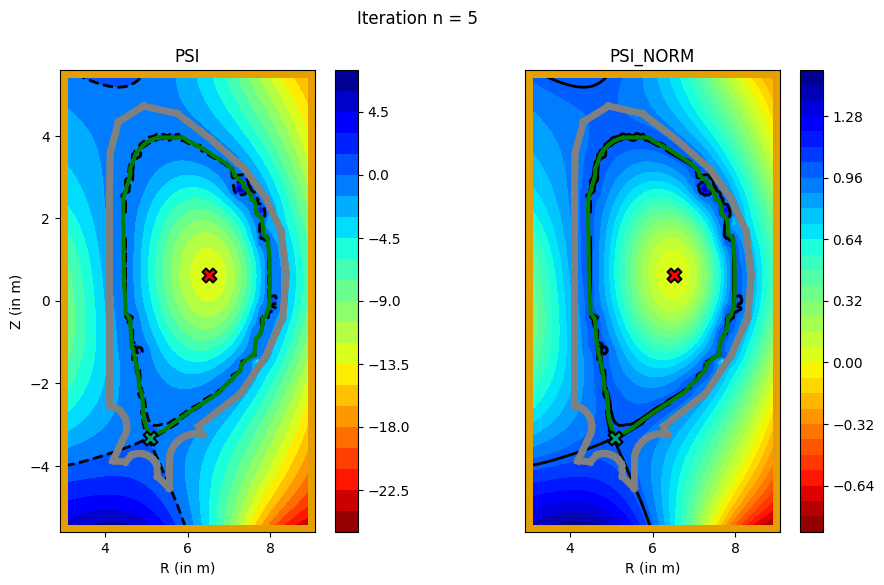

Internal iteration =  5 , PSI_NORM residu =  0.0015638957243793677
 
Plasma region unchanged: distance between consecutive saddle points =  0.04239728321454138
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  14999999.999999983
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52107021 0.62514522]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.160314239141822
SADDLE POINT AT  [ 5.08255895 -3.33768654]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.014046191031793701


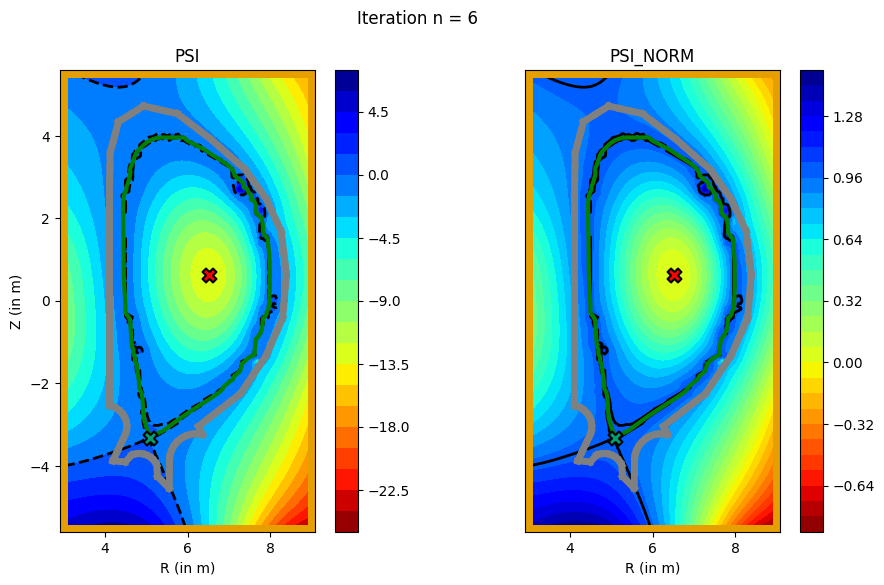

Internal iteration =  6 , PSI_NORM residu =  0.0007181142576441867
 
Plasma region unchanged: distance between consecutive saddle points =  0.04239058294039413
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  14999999.999999996
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52132043 0.62260803]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.160274240781831
SADDLE POINT AT  [ 5.08255036 -3.33768197]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.014044594445302365


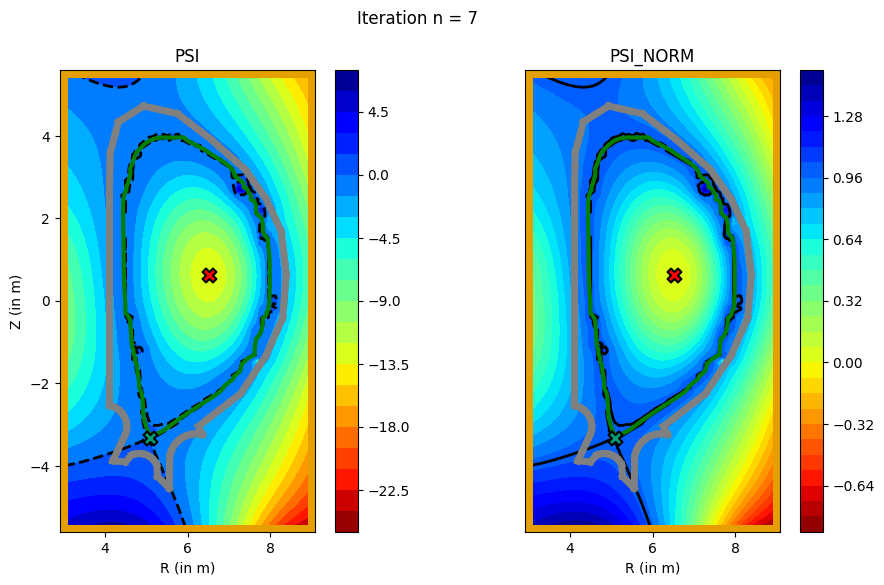

Internal iteration =  7 , PSI_NORM residu =  0.0003423031965343145
 
Plasma region unchanged: distance between consecutive saddle points =  0.04238727466651539
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  15000000.000000015
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52141176 0.62138501]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.160247845704747
SADDLE POINT AT  [ 5.08254621 -3.33767975]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.014043820075294913


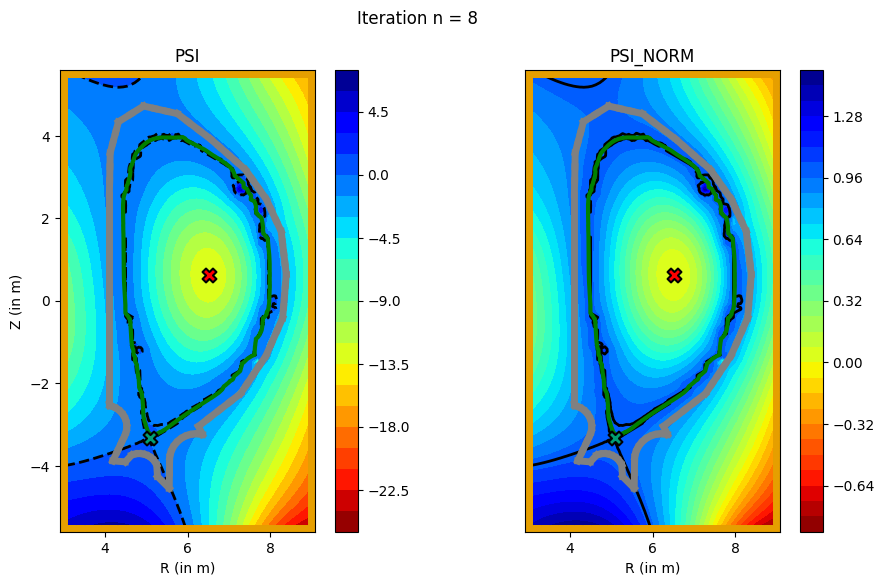

Internal iteration =  8 , PSI_NORM residu =  0.0001645797593699687
 
Plasma region unchanged: distance between consecutive saddle points =  0.04238566932176821
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  14999999.999999927
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52144774 0.6207954 ]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.160254376590714
SADDLE POINT AT  [ 5.08254419 -3.33767867]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.01404344248843934


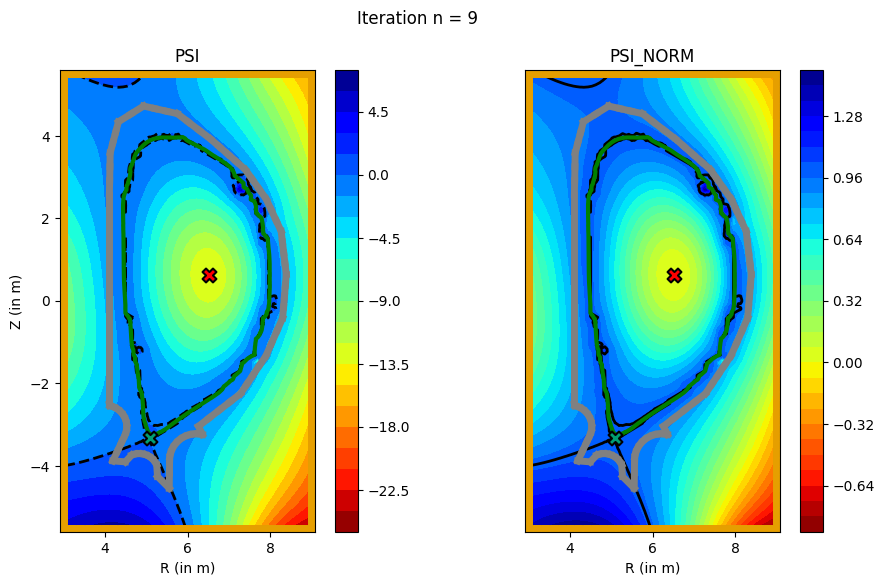

Internal iteration =  9 , PSI_NORM residu =  7.934079579304718e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.042384886310702696
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.047344764914172346
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  14999999.999999976
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52141881 0.61995139]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.157095036657863
SADDLE POINT AT  [ 5.17846603 -3.25315657]  (ELEMENT  2371 ) WITH VALUE PSI_X =  0.00020894936637237866


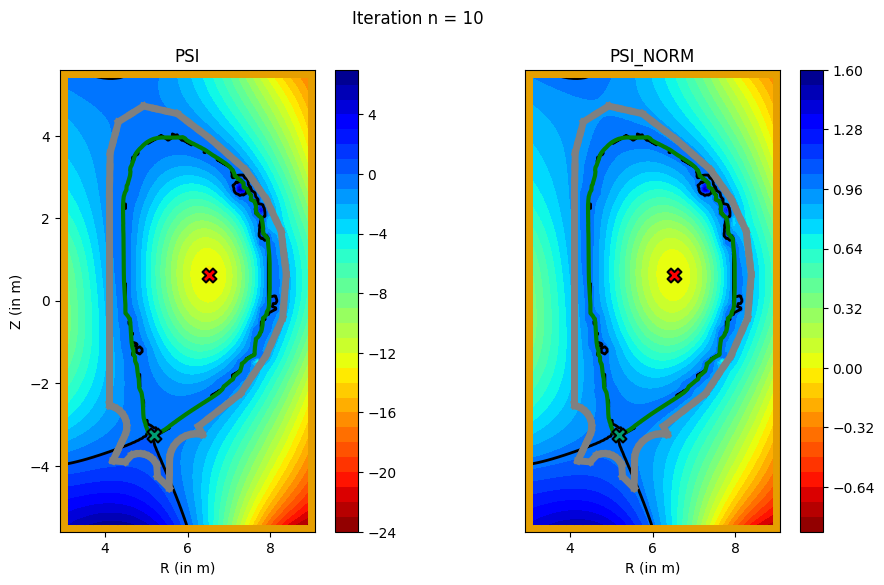

Internal iteration =  1 , PSI_NORM residu =  0.025980734364482602
 
Plasma region unchanged: distance between consecutive saddle points =  0.099462153587564
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  14999999.999999985
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52140188 0.61948429]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.144240538966272
SADDLE POINT AT  [ 5.17811642 -3.25307303]  (ELEMENT  2371 ) WITH VALUE PSI_X =  0.000220352861432434


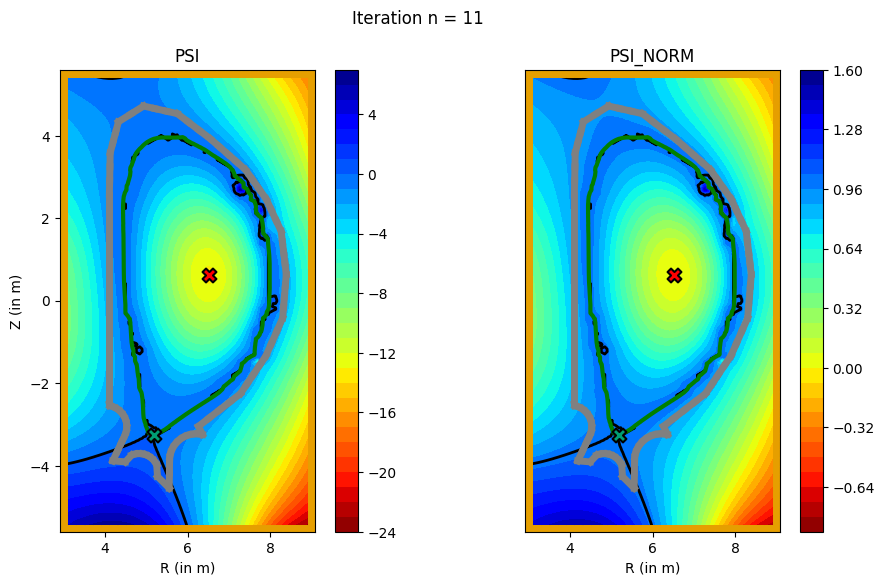

Internal iteration =  2 , PSI_NORM residu =  0.0005688715426025437
 
Plasma region unchanged: distance between consecutive saddle points =  0.0991821946613688
 
OUTER ITERATION = 2 , INNER ITERATION = 3
     Total current =  14999999.999999966
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52138913 0.61923721]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.141355784197257
SADDLE POINT AT  [ 5.17808696 -3.25306587]  (ELEMENT  2371 ) WITH VALUE PSI_X =  0.0002213310017336084


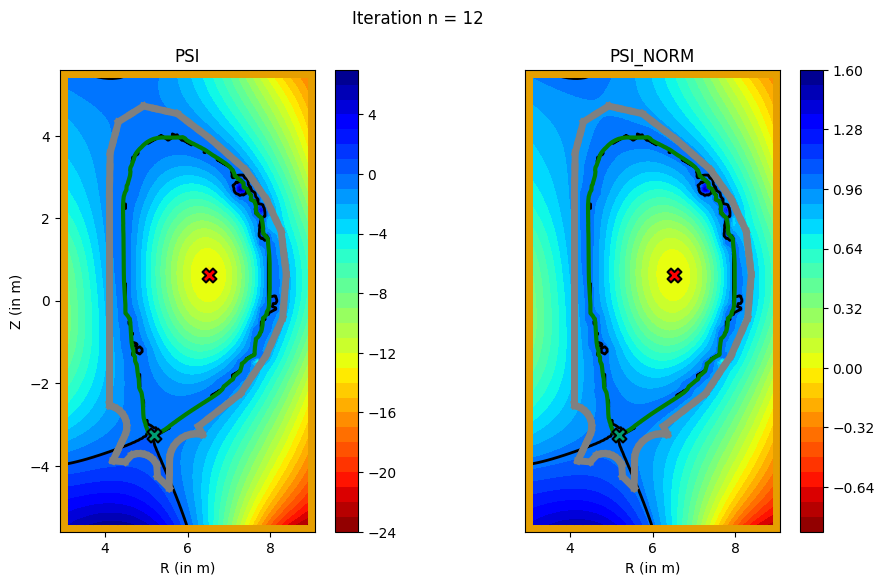

Internal iteration =  3 , PSI_NORM residu =  0.00013191583657064007
 
Plasma region unchanged: distance between consecutive saddle points =  0.09915867861688986
 
OUTER ITERATION = 2 , INNER ITERATION = 4
     Total current =  15000000.000000034
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.52138369 0.61911717]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.140893541314519
SADDLE POINT AT  [ 5.17807727 -3.25306356]  (ELEMENT  2371 ) WITH VALUE PSI_X =  0.0002216512951944447


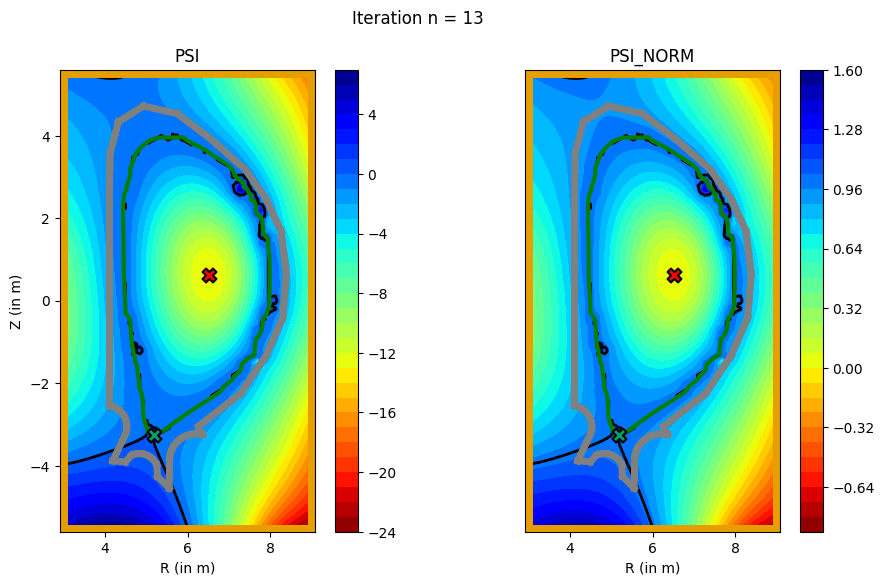

Internal iteration =  4 , PSI_NORM residu =  2.741840284929237e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.09915092720911703
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  2 , PSI_B residu =  0.00043755966500716844
 
SOLUTION CONVERGED


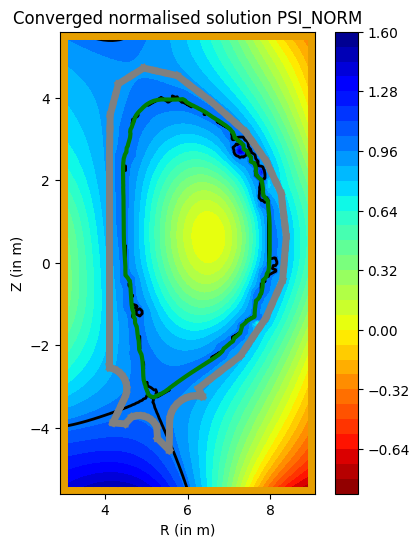

In [10]:
## NAME SIMULATION CASE 
CASE = "TS-FREE-APEC-ITER-COILS"

## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)